In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [256]:
#import data

customer_cases = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/Customer subscription Python project/customer_cases.csv',index_col = 0)
customer_info = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/Customer subscription Python project/customer_info.csv',index_col = 0)
customer_product = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/Customer subscription Python project/customer_product.csv',index_col = 0)
product_info = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/Customer subscription Python project/product_info.csv')

In [257]:
# Let's have a quick look at the data

customer_cases.head()

,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [258]:
customer_info.head()

,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male


In [259]:
customer_product.head()

,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [260]:
product_info = product_info.rename(columns = {'product_id':'product'})
product_info.head()

,product,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [261]:
# Let's join tables to make it easier for comparing data

tb1 = pd.merge(customer_cases,customer_info,how = 'left', on = 'customer_id')
tb2 = pd.merge(tb1, customer_product, how = 'left', on = 'customer_id')
tb3 = pd.merge(tb2, product_info, how = 'left', on = 'product')
tb3.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [262]:
#Before further data cleaning, let's check the type of values in each column
print(tb3.dtypes)

case_id             object
date_time           object
customer_id         object
channel             object
reason              object
age                  int64
gender              object
product             object
signup_date_time    object
cancel_date_time    object
name                object
price                int64
billing_cycle        int64
dtype: object


In [263]:
# Transform data and make it easier for reading. Delete columns that are irrevelant to the
# following analysis (date).

if_cancel = []

for n in tb3['cancel_date_time']:
    if type(n) == float:
        if_cancel.append(0) 
    else:
        if_cancel.append(1)
        
tb3['if_cancel'] = if_cancel

tb3 = tb3.drop(['date_time','signup_date_time','cancel_date_time'], axis = 1)

tb3.head()

,case_id,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,if_cancel
0,CC101,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,0
1,CC102,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,1
2,CC103,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,1
3,CC104,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,0
4,CC105,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,1


In [264]:
# Classify customers into three groups based on their ages, which will be easier for following analysis
# to find a pattern.


age_range = []

for n in tb3['age']:
    if n >= 0 and n < 40:
        age_range.append('Young')
    elif n >= 40 and n < 60:
        age_range.append('Middle')
    else:
        age_range.append('Old')
        
tb3['age_range'] = age_range

tb3 = tb3.rename(columns = {'name':'subscription_type'})

tb3.head()

,case_id,customer_id,channel,reason,age,gender,product,subscription_type,price,billing_cycle,if_cancel,age_range
0,CC101,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,0,Old
1,CC102,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,1,Old
2,CC103,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,1,Middle
3,CC104,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,0,Old
4,CC105,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,1,Old


Text(0.5, 1.0, 'Subscription Composition')

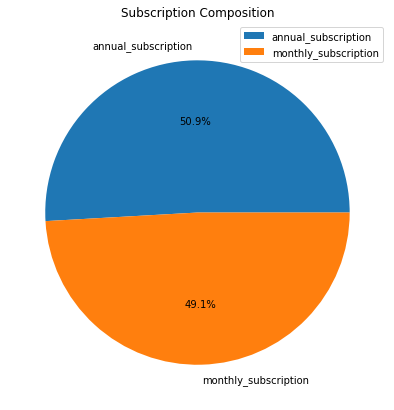

In [265]:
# Let's have a brief look at how people subscribe. 
# Is annual payment preferred or monthly payment?
fig, ax = plt.subplots(figsize = (10,7))
values = tb3['subscription_type'].value_counts().values
label = tb3['subscription_type'].value_counts().index
ax.pie(values, labels = label, autopct = '%1.1f%%')
ax.legend(label, loc = 'upper right')
ax.set_title('Subscription Composition')

Text(0.5, 1.0, 'Gender Composition')

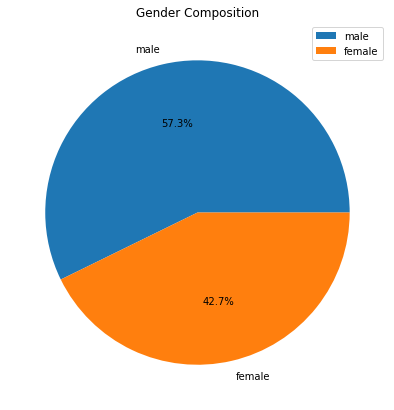

In [266]:
# Create a pie chart to discover customers' subscription pattern based on gender and reason for subscription.
fig, ax = plt.subplots(figsize = (10,7))
values = tb3['gender'].value_counts().values
label = tb3['gender'].value_counts().index
ax.pie(values, labels = label, autopct = '%1.1f%%')
ax.legend(label, loc = 'upper right')
ax.set_title('Gender Composition')

Text(0.5, 1.0, 'Age group Composition')

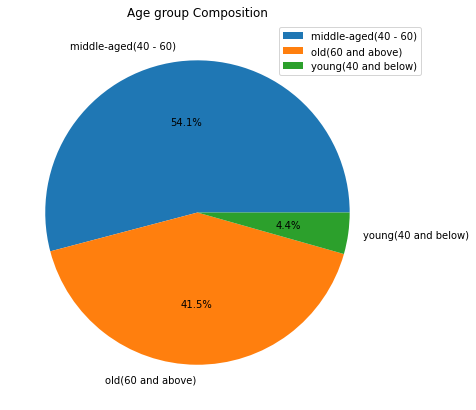

In [267]:
# Let's categorize customers into 3 age groups and look at the age composition of customers.

tb3['age_range'] = pd.cut(tb3['age'], [0,40,60,100], labels = ['young(40 and below)','middle-aged(40 - 60)','old(60 and above)'])
fig, ax = plt.subplots(figsize = (10,7))
values = tb3['age_range'].value_counts().values
label = tb3['age_range'].value_counts().index
ax.pie(values, labels = label, autopct = '%1.1f%%')
ax.legend(label, loc = 'upper right',bbox_to_anchor = (1.1,1))
ax.set_title('Age group Composition')

Text(0.5, 1.0, 'Channel Composition')

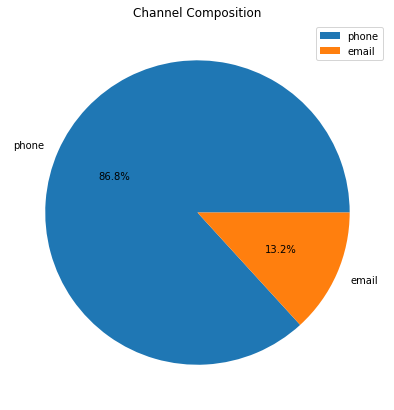

In [268]:
# Customers seem to strongly prefer phone to email as the main channel, which seems normal for middle-aged
# and old people.

fig, ax = plt.subplots(figsize = (10,7))
values = tb3['channel'].value_counts().values
label = tb3['channel'].value_counts().index
ax.pie(values, labels = label, autopct = '%1.1f%%')
ax.legend(label, loc = 'upper right')
ax.set_title('Channel Composition')

Text(0.5, 1.0, 'Reason Composition')

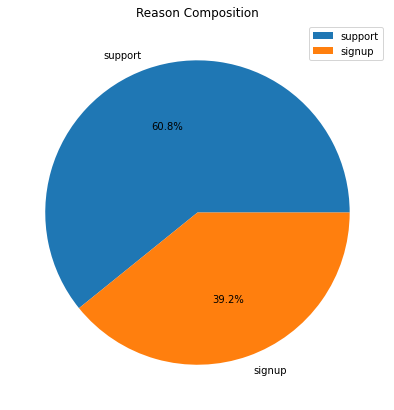

In [269]:
# Finally, let's look at if there are more customers signing up or supporting.

fig, ax = plt.subplots(figsize = (10,7))
values = tb3['reason'].value_counts().values
label = tb3['reason'].value_counts().index
ax.pie(values, labels = label, autopct = '%1.1f%%')
ax.legend(label, loc = 'upper right')
ax.set_title('Reason Composition')

In [270]:
# Now that we have identified some general traits of customers, let's further look at the churn rates
# of different groups using a defined function.
tb3
def churn_plot(columns):
   
    tb3.groupby(columns)["if_cancel"].mean().plot(kind="barh",label="Churn Probability")
    plt.legend(bbox_to_anchor=(0.75,1.15))
    plt.xlabel("PROBABILITY")
    plt.show()


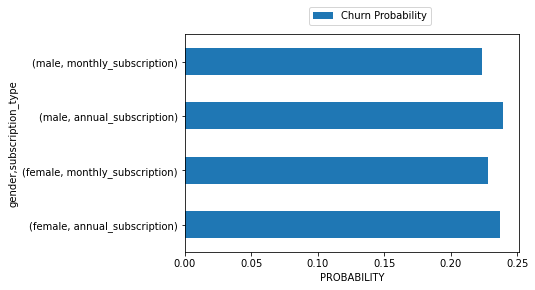

In [271]:
churn_plot(['gender','subscription_type'])

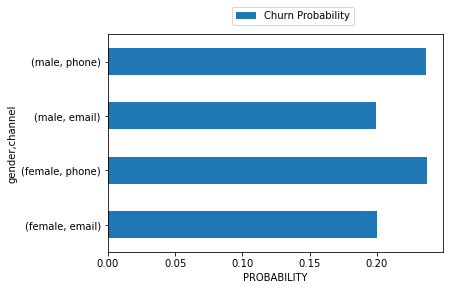

In [272]:
churn_plot(['gender','channel'])

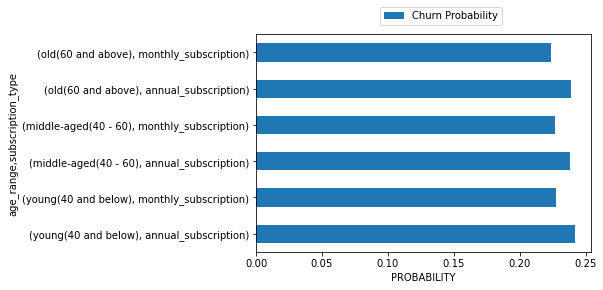

In [273]:
churn_plot(['age_range','subscription_type'])

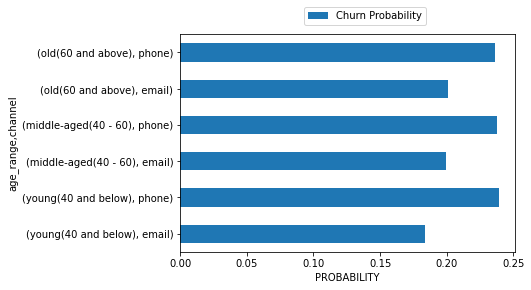

In [274]:
churn_plot(['age_range','channel'])

In [275]:
tb3.head()

,case_id,customer_id,channel,reason,age,gender,product,subscription_type,price,billing_cycle,if_cancel,age_range
0,CC101,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,0,old(60 and above)
1,CC102,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,1,old(60 and above)
2,CC103,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,1,middle-aged(40 - 60)
3,CC104,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,0,old(60 and above)
4,CC105,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,1,old(60 and above)


In [276]:
# Finally, let's fit the data into a logistic model to find the relationship between different groups and
# their cancel decision.

Channel = pd.get_dummies(tb3['channel'],drop_first = True)
Reason = pd.get_dummies(tb3['reason'],drop_first = True)
Gender = pd.get_dummies(tb3['gender'],drop_first = True)
Product = pd.get_dummies(tb3['product'],drop_first = True)
Sub = pd.get_dummies(tb3['subscription_type'],drop_first = True)
df = tb3.drop(['channel','reason','gender','product','subscription_type','age_range','customer_id','case_id'],axis = 1,inplace = True)

df = pd.concat([tb3,Channel,Reason,Gender,Product,Sub],axis = 1)

df.head()

,age,price,billing_cycle,if_cancel,phone,support,male,prd_2,monthly_subscription
0,76,1200,12,0,1,0,0,0,0
1,61,1200,12,1,1,0,1,0,0
2,58,1200,12,1,1,0,0,0,0
3,62,125,1,0,1,0,0,1,1
4,71,1200,12,1,1,0,1,0,0


In [277]:
from sklearn.model_selection import train_test_split

In [278]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('if_cancel',axis=1),df['if_cancel'],
                                                   test_size = 0.3, random_state = 101)

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [282]:
predictions = logmodel.predict(x_test)

In [285]:
from sklearn.metrics import classification_report, confusion_matrix

In [284]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     76209
           1       0.00      0.00      0.00     22945

    accuracy                           0.77     99154
   macro avg       0.38      0.50      0.43     99154
weighted avg       0.59      0.77      0.67     99154



/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
print(confusion_matrix(y_test, predictions))

[[76209     0]
 [22945     0]]
